In [138]:
# Import dependencies for the project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import datetime
import time
%matplotlib inline

In [2]:
#Reading all csv files
cab_df= pd.read_csv('Cab_Data.csv')
customer_df=pd.read_csv('Customer_ID.csv')
transaction_df=pd.read_csv('Transaction_ID.csv')
city_df=pd.read_csv('City.csv')


In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


# Merging the different csv files to one create a dataframe

Merging customer_df and transaction_df based on 'Customer ID' column

In [26]:
customer_transaction=customer_df.merge(transaction_df, how='inner', on='Customer ID',  left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
customer_transaction.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


Merging customer_transaction and cab_df based on 'Transaction ID' column

In [61]:
cab_customer=cab_df.merge(customer_transaction, how='inner', on='Transaction ID',  left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
cab_customer

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card


Merging cab_customer and city_df based on 'City' column

In [177]:
cab_data=cab_customer.merge(city_df, how='inner', on='City',  left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card,"418,859","127,001"


In [178]:
cab_data['Profit']= round(cab_data['Price Charged'] - cab_data['Cost of Trip'], 2)
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card,"814,885","24,701",57.32
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card,"814,885","24,701",23.67
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash,"814,885","24,701",27.57
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash,"814,885","24,701",25.80
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card,"814,885","24,701",16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash,"418,859","127,001",5.88
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash,"418,859","127,001",6.90
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash,"418,859","127,001",87.42
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card,"418,859","127,001",32.14


# Data Cleaning:

Checking for null values in the data

In [179]:
cab_data.isnull()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


checking for nan if any present in the data

In [180]:
cab_data.isna().any()

Transaction ID        False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
Payment_Mode          False
Population            False
Users                 False
Profit                False
dtype: bool

checking for duplicate values in the data

In [181]:
cab_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

In [182]:
# Converting Datetime 
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])
cab_data = cab_data.rename(columns = {'Date of Travel': 'Date Time'})
cab_data.head()

,Transaction ID,Date Time,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Profit
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,"814,885","24,701",57.32
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,"814,885","24,701",23.67
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,"814,885","24,701",27.57
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,"814,885","24,701",25.80
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,"814,885","24,701",16.84


In [183]:
#Splitting Date from the Date Time column
cab_data['Date'] = pd.to_datetime(cab_data['Date Time']).dt.date

In [184]:
cab_data.head()

,Transaction ID,Date Time,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Profit,Date
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,"814,885","24,701",57.32,1970-01-01
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,"814,885","24,701",23.67,1970-01-01
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,"814,885","24,701",27.57,1970-01-01
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,"814,885","24,701",25.80,1970-01-01
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,"814,885","24,701",16.84,1970-01-01


In [185]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date Time           359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Gender              359392 non-null  object        
 9   Age                 359392 non-null  int64         
 10  Income (USD/Month)  359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [186]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253197
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.010000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.960000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.970000


# Grouping the Dataset based on the cab company for further analysis

In [187]:
pink_cab = cab_data[cab_data['Company'] == 'Pink Cab']
pink_cab

,Transaction ID,Date Time,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Profit,Date
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,"814,885","24,701",57.32,1970-01-01
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,"814,885","24,701",23.67,1970-01-01
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,"814,885","24,701",27.57,1970-01-01
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,"814,885","24,701",25.80,1970-01-01
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,"814,885","24,701",16.84,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359159,10437610,1970-01-01 00:00:00.000043106,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,51142,Female,40,3122,Card,"418,859","127,001",48.59,1970-01-01
359160,10437611,1970-01-01 00:00:00.000043465,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,52754,Female,29,19676,Card,"418,859","127,001",85.34,1970-01-01
359161,10437612,1970-01-01 00:00:00.000043107,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,53039,Male,37,22765,Card,"418,859","127,001",58.39,1970-01-01
359162,10437614,1970-01-01 00:00:00.000043102,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,51766,Male,18,12364,Cash,"418,859","127,001",31.56,1970-01-01


In [188]:
yellow_cab = cab_data[cab_data['Company'] == 'Yellow Cab']
yellow_cab

,Transaction ID,Date Time,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Profit,Date
6,10000384,1970-01-01 00:00:00.000042371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Male,23,8542,Card,"814,885","24,701",877.01,1970-01-01
7,10000385,1970-01-01 00:00:00.000042378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Male,28,3901,Cash,"814,885","24,701",895.78,1970-01-01
8,10000386,1970-01-01 00:00:00.000042372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,27884,Male,32,13505,Cash,"814,885","24,701",232.33,1970-01-01
9,10000387,1970-01-01 00:00:00.000042375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,28533,Male,39,28386,Cash,"814,885","24,701",504.16,1970-01-01
10,10000388,1970-01-01 00:00:00.000042376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Male,35,17761,Card,"814,885","24,701",944.19,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1970-01-01 00:00:00.000043108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash,"418,859","127,001",5.88,1970-01-01
359388,10440104,1970-01-01 00:00:00.000043104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash,"418,859","127,001",6.90,1970-01-01
359389,10440105,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash,"418,859","127,001",87.42,1970-01-01
359390,10440106,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card,"418,859","127,001",32.14,1970-01-01


In [189]:
stat_agg_df=cab_data.groupby('Company').agg({'Profit' : ['mean', 'median', 'var', 'std', 'sem']})
stat_agg_df 

Profit                                           
                  mean median           var         std       sem
Company                                                          
Pink Cab     62.652176   41.5   6020.268633   77.590390  0.266586
Yellow Cab  160.259984  102.0  29523.429607  171.823833  0.327845

# Hypothesis to test:

#GENDER:

. Does gender play any role in choosing a cab compnay over other?

. Does the km travelled differ between cab companies based on gender?

. Does gender affect the overall profit of the cab companies?

#COLOR OF CAB:

. Does color of the cab change the preference of the users?

. Does color of the cab influence the profit of the companies?

#LOCATION OF THE COMPANY:

. Does location determine a companies overall profit/loss?

. Does location have any effect on the price charged and cost of the trip?

. Is location a factor for choosing a cab company?

#INCOME/PAYMENT METHOD:

. Is income of the users relate to the profit/loss of a cab company?

. Does payment method have any influence on selecting a specific cab company? 

# GENDER BASED ANALYSIS:

In [190]:
gender_df = cab_data.groupby(['Gender'])

In [191]:
gender_counts=gender_df.count()["Company"]
gender_counts_df=pd.DataFrame(gender_counts)
gender_counts_df

,Company
Gender,
Female,153480
Male,205912


In [192]:
total_count= cab_data['Gender'].count()
gender_percent=(gender_counts/total_count) * 100
gender_percent_df=pd.DataFrame(gender_percent)
gender_percent_df

,Company
Gender,
Female,42.705458
Male,57.294542


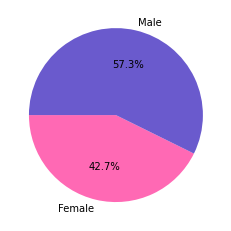

In [205]:
colors = ['hotpink', 'slateblue']
plt.pie(gender_percent_df["Company"], colors=colors, labels=gender_percent_df.index, autopct="%1.1f%%", startangle=180)
plt.show()

The overall percentage of the Male and Female users included in this analysisn is 57.3 and 42.7. There are more male users compared to the female users.

In [193]:
pink_gender=pink_cab. groupby(['Gender'])
pink_gcount=pd.DataFrame(pink_gender['Users'].count())
pink_gpercent=pd.DataFrame((pink_gcount/total_count) * 100)
pink_gpercent

,Users
Gender,
Female,10.428724
Male,13.141917


In [194]:
yellow_gender=yellow_cab. groupby(['Gender'])
yellow_gcount=pd.DataFrame(yellow_gender['Users'].count())
yellow_gcount
yellow_gpercent=pd.DataFrame((yellow_gcount/total_count) * 100)
yellow_gpercent

,Users
Gender,
Female,32.276734
Male,44.152624


Gender comparison based on the cab company signifies that the both Male and Female users preferred Yellow cab company compared to the Pink cab company. Male users were significantly higher compared to female users for both companies.

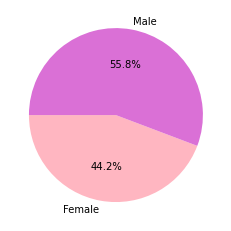

In [210]:
colors = ['lightpink', 'orchid']
plt.pie(pink_gpercent["Users"], labels=pink_gpercent.index, colors=colors, autopct="%1.1f%%", startangle=180)
plt.show()

The pie chart shows that among the pink cab users 55.8% were male and 44.2% were female.

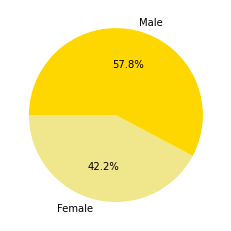

In [211]:
colors =['khaki', 'gold']
plt.pie(yellow_gpercent["Users"], labels=yellow_gpercent.index, colors =colors, autopct="%1.1f%%", startangle=180)
plt.show()

The pie chart shows that among the yellow cab users 57.8% were male and 42.2% were female.